Best bandit index: 2
Estimated probability of bandit 0: 0.27868852459016397
Estimated probability of bandit 1: 0.5166666666666667
Estimated probability of bandit 2: 0.739273927392739
Total reward: 1409.0
Overall win rate: 0.7045
Exploration count: 211
Exploitation count: 1789
Optimal bandit selection count: 1818


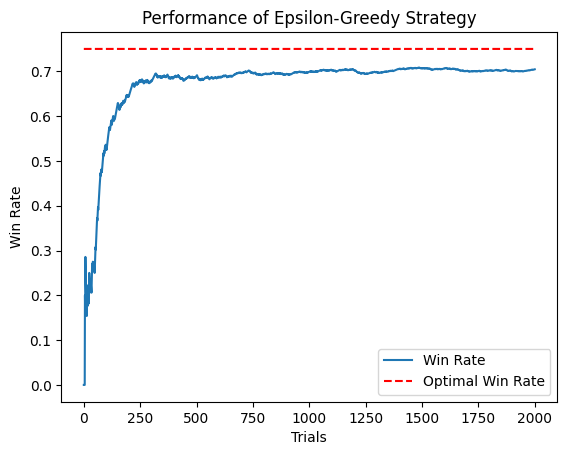

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Configuration for the experiment
TRIALS = 2000
EPSILON = 0.1
PROBABILITIES = [0.2, 0.5, 0.75]

class Bandit:
    def __init__(self, probability):
        self.probability = probability
        self.estimated_prob = 0.
        self.pull_count = 0.

    def pull(self):
        # Simulate a random draw with a success rate of `self.probability`
        return np.random.random() < self.probability

    def update_estimation(self, result):
        self.pull_count += 1.
        self.estimated_prob = ((self.pull_count - 1) * self.estimated_prob + result) / self.pull_count

def run_simulation():
    bandits = [Bandit(prob) for prob in PROBABILITIES]

    results = np.zeros(TRIALS)
    explore_count = 0
    exploit_count = 0
    optimal_selection_count = 0
    best_bandit_index = np.argmax([bandit.probability for bandit in bandits])
    print("Best bandit index:", best_bandit_index)

    for trial in range(TRIALS):
        # Apply epsilon-greedy strategy
        if np.random.random() < EPSILON:
            explore_count += 1
            selected_bandit = np.random.randint(len(bandits))
        else:
            exploit_count += 1
            selected_bandit = np.argmax([bandit.estimated_prob for bandit in bandits])

        if selected_bandit == best_bandit_index:
            optimal_selection_count += 1

        # Simulate pulling the selected bandit and log the reward
        outcome = bandits[selected_bandit].pull()
        results[trial] = outcome

        # Update the estimation for the selected bandit
        bandits[selected_bandit].update_estimation(outcome)

    # Display final estimated probabilities
    for idx, bandit in enumerate(bandits):
        print(f"Estimated probability of bandit {idx}:", bandit.estimated_prob)

    # Summary statistics
    print("Total reward:", results.sum())
    print("Overall win rate:", results.sum() / TRIALS)
    print("Exploration count:", explore_count)
    print("Exploitation count:", exploit_count)
    print("Optimal bandit selection count:", optimal_selection_count)

    # Plotting results
    cumulative_rewards = np.cumsum(results)
    win_rate_over_time = np.insert(cumulative_rewards / (np.arange(TRIALS) + 1), 0, 0)  # Start from zero
    plt.plot(np.arange(TRIALS + 1), win_rate_over_time, label='Win Rate')
    plt.plot(np.arange(TRIALS + 1), np.ones(TRIALS + 1) * np.max(PROBABILITIES), linestyle='--', color='red', label='Optimal Win Rate')
    plt.xlabel('Trials')
    plt.ylabel('Win Rate')
    plt.title('Performance of Epsilon-Greedy Strategy')
    plt.legend()
    plt.show()

run_simulation()
